# Grading Rubric
### Business Understanding (10 points total).

• Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

(Nnenna)


We are predicting Injury Severity 

### Data Understanding (80 points total)

#### Data Meaning Type
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

(Nnenna)
#### Data Quality
• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.

(Satvik and Dylan)
Data cleaning - added features, cleaned

scatter plots

#### Simple Statistics
• [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

(Dylan)
describe()

#### Visualize Attributes
• [15 points] Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

bar graph top makes or model

proportion plots - classification

Satvik

#### Explore Joint Attributes
• [15 points] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

(Jobin)
boxplots - injury severity

correlation

violin plot 




#### Explore Attributes and Class
• [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Accuracy, precision, recall - categorical
ROC Curves, AUC

RMSE
(Jobin)

#### New Features
• [5 points] Are there other features that could be added to the data or created from existing features? Which ones?

Copy from earlier, use some columns for another dataset.

Dylan/Satvik

#### Exceptional Work (10 points total)
• You have free reign to provide additional analyses.
• One idea: implement dimensionality reduction, then visualize and interpret the results.  

# Lab 1 - Visualization and Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import plotly.express as px
import plotly.graph_objects as go

# Business Understanding

### Describe the purpose of the data set you selected:

• Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

Info about number of records, number of attributes etc.

### Data selection and purpose
We used the Aviation dataset from the NTSB aviation accident database. The data contains information from 1962 to present about aviation accidents and incidents within the United States, its territories, and possessions, and in international waters. The NTSB database contains preliminary and final reports. The dataset has 85,000 records with 31 columns which meets our requirements for this project because we have a significant amount of data. We downloaded the data from Kaggle website https://www.kaggle.com/khsamaha/aviation-accident-database-synopses.

The purpose of the data was to get a better understanding of aviation accidents- why they occur, the pattern among the incidents, aviation safety through the years. The dataset can also be used to answer useful questions like in what cases are the injuries fatal? During what phase of flight have accidents/incidents occurred more?

### Importance of data
The dataset is important because we can make predictions, so we know we have mined useful information. We will be predicting the Aircraft damage and Broad phase of the flight for classification problem.
We will be measuring the effectiveness of a good prediction algorithm using 10-fold cross validation and use accuracy as our metrics. Predicting the Aircraft damage classification will be good for safety because it analyzes climate changes, different flying conditions that can cause accidents. This will help air travel become safer and educate potential travelers to increase faith in flight.  
Predicting the Broad phase of flight will enable us to explore the time the flight accident occurred like "takeoff" for example.




In [2]:
#Read in the Aviation Data
aviation_data = pd.read_csv("Data/AviationData.csv")
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

# Data Understanding

### Data Meaning Type

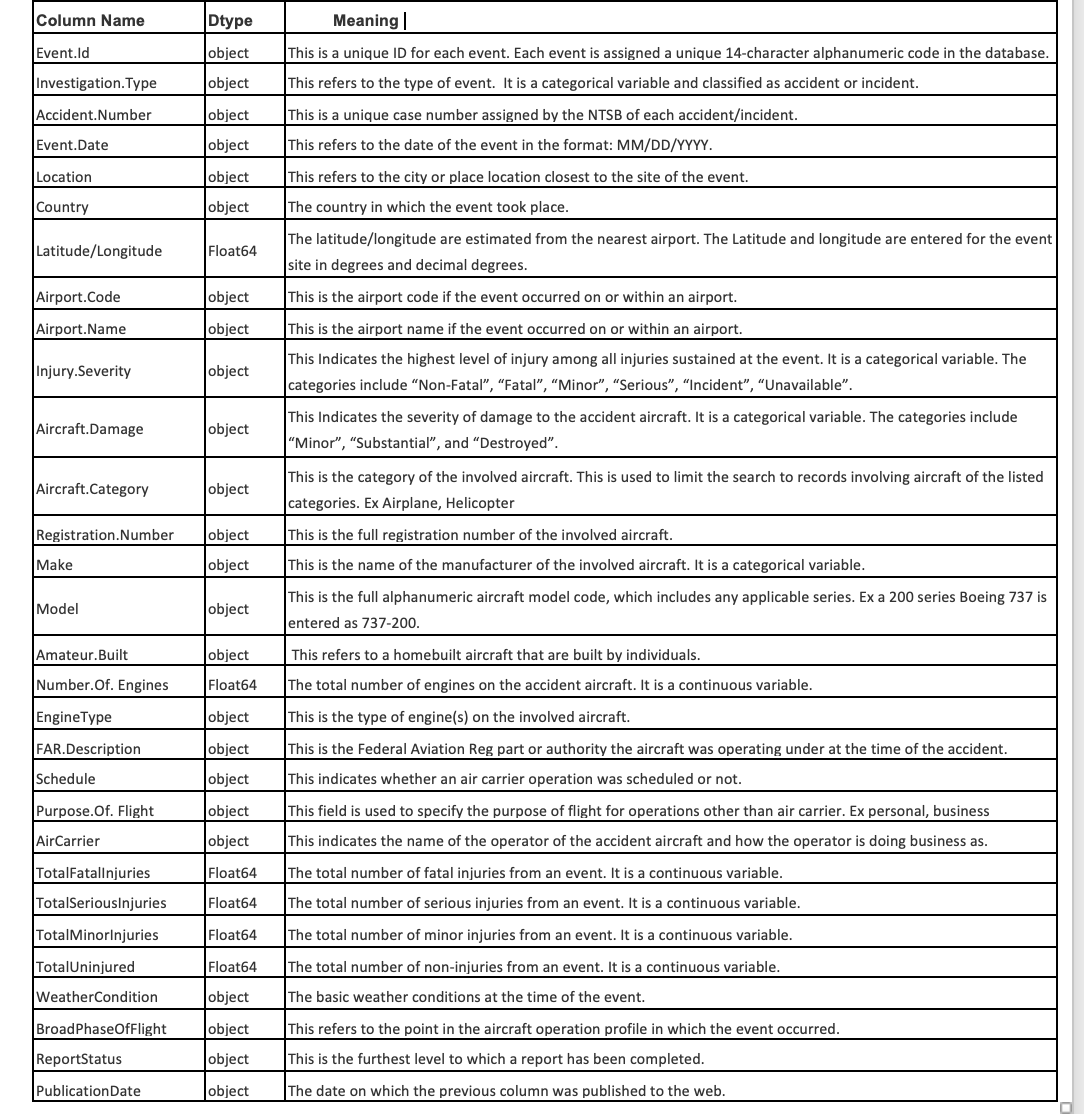

• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

In [3]:
pd.set_option('display.max_columns', 32)
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,Fatal,Substantial,Airplane,N13VT,Velocity,Vtwin,No,2.0,NaN,91,NaN,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,Fatal,Destroyed,Helicopter,N13AT,Bell,206,No,1.0,NaN,91,NaN,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,Minor,Substantial,Airplane,N56517,Maule,M-6-235,No,1.0,NaN,91,NaN,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,Non-Fatal,Substantial,Airplane,N3477E,Cessna,172N,No,1.0,NaN,91,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,Minor,Substantial,Airplane,N8183C,Piper,PA-18,No,1.0,NaN,91,NaN,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


### Data Quality

• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.


In [4]:
#We have 30 columns to work with
#First we will check to see what percent of each column is null

#Percent of missing data
percent_missing = aviation_data.isnull().sum() * 100 / len(aviation_data)
#Create DF 
missing_value_df = pd.DataFrame({'column_name': aviation_data.columns,
                                 'percent_missing': percent_missing})
#Then sort by least to most
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Air.carrier,Air.carrier,94.660138
Schedule,Schedule,85.834419
FAR.Description,FAR.Description,66.352238
Aircraft.Category,Aircraft.Category,66.006793
Longitude,Longitude,63.271145
Latitude,Latitude,63.260677
Airport.Code,Airport.Code,43.458640
Airport.Name,Airport.Name,40.334512
Total.Serious.Injuries,Total.Serious.Injuries,35.486647
Total.Minor.Injuries,Total.Minor.Injuries,34.057179


##### Missing Values
Looking at the missing values, there are several values we would like to remove. We want to remove the Schedule column, because 85% of the observations are missing and FAR.description because 66% of the observations are missing. Other columns of interest such as Event Id appear to have many redundant and unusable values due to being transformed by a program like Excel. Other features like Longitude, Latitude, Airport Code, Registration Number, and Event Date are not useful predictors in the model. So they have been removed.

Add part about converting NAs for injuries to zero

##### Outliers

When dealing with outliers were looked at our continious variables. There was one record with an 8 engin plane which is not a common format these days. Since it is only one record we elected to remove it. Next we looked at our 3 injury stats. Using boxplots we can see some right skewness in the data with two outliers. One in total fatal injuries and the other in total minor injuries. Since this was only two records we simply removed them from our data.


##### Duplicate data
When dealing with duplicates we used Accident.Number to address any duplicates in the data. As the NTSB takes in accidents each are assigned an accident number. Regarding this dataset we did find one duplicate which was removed. We can also see that all the info was the same for the two records also indicating that it was entered twice. We combined the known data for a more complete record.

##### Adding Features
We wanted to create some additional predictors in our data that may be more meaningful. First, we wanted to split the 'LOCATION' column into a "City" and "State Column". Next, we will add a column called "Total Injuries" which is the sum of Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries. We added a "Year" column to make graphs more managable.


<AxesSubplot:>

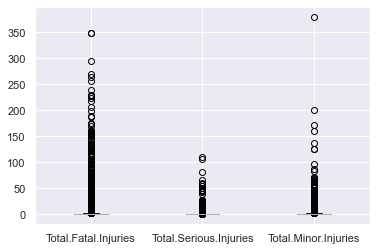

In [5]:
#dealing with outliers
inj_stat = aviation_data[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']]
inj_stat.boxplot()
#here we see two outliers with some right skewness in our data                       

<AxesSubplot:>

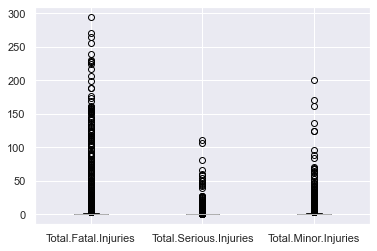

In [6]:
#removing the two outliers
aviation_data = aviation_data.loc[aviation_data['Total.Fatal.Injuries']!=aviation_data['Total.Fatal.Injuries'].max()]
aviation_data = aviation_data.loc[aviation_data['Total.Minor.Injuries']!=aviation_data['Total.Minor.Injuries'].max()]
inj_stat = aviation_data[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']]
inj_stat.boxplot()

Our data is right skewed however, there were still some strong outliers which we decided to remove. Since there was onyl two values we were confortable removing them. Our data will still be right skewed but much less so with this removal of outliers.

In [8]:
#splitting state and city from location
aviation_data['City'] = aviation_data['LOCATION'].str.split(',').str[0]
aviation_data['State'] = aviation_data['LOCATION'].str.split(',').str[1]

In [9]:
#Converted NaN to 0 so we can create the total Injuries column

In [10]:
#adding a total injuries column
#next we need to fill in the NaN values with the injury columns in order to make our new column
#many of the rows filled in NaN opposed to 0 for number of injuries
aviation_data.update(aviation_data[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].fillna(0))

aviation_data["Total_Injuries"] = aviation_data['Total.Fatal.Injuries'] \
                            + aviation_data['Total.Serious.Injuries'] \
                            + aviation_data['Total.Minor.Injuries']
num_inj=aviation_data[["Total_Injuries",'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',]]
num_inj.tail(10)

,Total_Injuries,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
85966,3.0,0.0,0.0,3.0
85967,0.0,0.0,0.0,0.0
85968,0.0,0.0,0.0,0.0
85969,4.0,4.0,0.0,0.0
85970,1.0,0.0,0.0,1.0
85971,3.0,1.0,2.0,0.0
85972,2.0,2.0,0.0,0.0
85973,3.0,3.0,0.0,0.0
85974,4.0,4.0,0.0,0.0
85975,2.0,2.0,0.0,0.0


In [11]:
#next we want to add a year column to help with graphs later on
aviation_data["Year"] = aviation_data['Event.Date'].str.split('-').str[0]
aviation_data["Year"].astype(int)

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
85971    1979
85972    1977
85973    1974
85974    1962
85975    1948
Name: Year, Length: 85973, dtype: int64

##### Duplicates

In [12]:
#checking for duplicates
#before we step into ourliars we would like to look for duplicates
#using the field acident number we will search for duplicates
aviation_data[aviation_data.duplicated(subset=['Accident.Number'])]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries,Year
973,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865554,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,SHIRLEY,NY,0.0,2020


In [13]:
#now that we see we have a duplicate lets compare them
aviation_data[aviation_data['Accident.Number']=='ERA20CA175']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries,Year
972,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,Preliminary,15-05-2020,SHIRLEY,NY,0.0,2020
973,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865554,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,SHIRLEY,NY,0.0,2020


In [14]:
#remove the duplicate and merge in the data
aviation_data = aviation_data.drop_duplicates(subset='Accident.Number', keep="last")
aviation_data[aviation_data['Accident.Number']=='ERA20CA175'] #Checking for dups
#replace missing values in the duplicate kept - change report status from NaN to Preliminary
#rc_avaition.loc[rc_avaition['Accident.Number'] == , 'ERA20CA175'] = 1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries,Year
973,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865554,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,SHIRLEY,NY,0.0,2020


When dealing with duplicates we used Accident.Number to address any duplicates in the data. As the NTSB takes in accidents each are assigned an accident number. Regarding this dataset we did find one duplicate which was removed. We can also see that all the info was the same for the two records also indicating that it was entered twice. We combined the known data for a more complete record.

In [15]:
aviation_data = aviation_data.loc[aviation_data["Number.of.Engines"]!=8.0]
engines=aviation_data["Number.of.Engines"].value_counts().reset_index()
engines

,index,Number.of.Engines
0,1.0,67513
1,2.0,10793
2,0.0,1182
3,3.0,481
4,4.0,428


Removed 8.0 engine aircraft because this style of aircraft is out of date and isn't supported much
Since there was only 1 record of an 8 engine aircraft we felt confortable removing the record. One other interesting thing we noticed about number of engines is a value of 0. What is a 0 Engin aircraft? Investigation below:

In [16]:
zero_eng = aviation_data.loc[aviation_data["Number.of.Engines"] == 0.0]
zero_eng["Aircraft.Category"]

73           Glider
75          Balloon
277      Helicopter
308          Glider
679          Glider
            ...    
85535        Glider
85550       Balloon
85616       Balloon
85727       Balloon
85908        Glider
Name: Aircraft.Category, Length: 1182, dtype: object

After isolating the 0 engine rows we were able to see that transportation divices such as gliders and hot air baloons are in the data set and it was not a mistake. Nothing more to be one here. 

In [17]:
injuryseverity = aviation_data["Injury.Severity"].value_counts().reset_index()
injuryseverity

,index,Injury.Severity
0,Non-Fatal,64383
1,Fatal(1),8435
2,Fatal(2),4970
3,Incident,3651
4,Fatal(3),1552
...,...,...
126,Fatal(141),1
127,Fatal(58),1
128,Fatal(55),1
129,Fatal(295),1


##### Injury Severity column fixing the levels
Data clean up require us to fix the Injury Severity column. As you can see there are some observations that have incorrectly names

In [18]:
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('Non-Fatal', na=False), 'Injury.Severity'] = 'latafnon'
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('Fatal', na=False), 'Injury.Severity'] = 'Fatal'
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('latafnon', na=False), 'Injury.Severity'] = 'Non-Fatal'

#fill in NA values with Unavailable
aviation_data['Injury.Severity'] = aviation_data['Injury.Severity'].fillna("Unavailable")
#fix spelling error of Siruose
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('Siruose', na=False), 'Injury.Severity'] = 'Serious'

injuryseverity = aviation_data["Injury.Severity"].value_counts().reset_index()
injuryseverity

,index,Injury.Severity
0,Non-Fatal,64383
1,Fatal,17273
2,Incident,3651
3,Unavailable,441
4,Minor,122
5,Serious,101


In [19]:
#Filled NaNs to Unknowns
aviation_data.update(aviation_data.fillna("Unknown"))
aviation_data.head(1)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries,Year
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,Unknown,Unknown,Fatal,Substantial,Airplane,N13VT,Velocity,Vtwin,...,91,Unknown,Ferry,Unknown,2.0,0.0,0.0,0.0,VMC,Unknown,Unknown,Unknown,JANESVILLE,WI,2.0,2021


In [20]:
weather = aviation_data["Weather.Condition"].value_counts().reset_index()
weather

,index,Weather.Condition
0,VMC,75324
1,IMC,5899
2,Unknown,3670
3,UNK,1072
4,Unk,6


In [21]:
#upon looking at the Weather.Condition we noticed some inconsistancies with UNK and Unk for unknown. We will correct that
aviation_data.loc[aviation_data['Weather.Condition'].str.contains('UNK', na=False), 'Weather.Condition'] = 'Unknown'
aviation_data.loc[aviation_data['Weather.Condition'].str.contains('Unk', na=False), 'Weather.Condition'] = 'Unknown'

In [22]:
#check to make sure the UNK issue was taken care of
weather = aviation_data["Weather.Condition"].value_counts().reset_index()
weather

,index,Weather.Condition
0,VMC,75324
1,IMC,5899
2,Unknown,4748


Removed the columns for final dataframe

In [23]:
rc_aviation = aviation_data.copy()
rc_aviation = rc_aviation.drop(columns=['FAR.Description', 'Event.Id',"Longitude",
                                        "Latitude","Airport.Code","Publication.Date","Registration.Number","LOCATION",
                                        "Schedule","Event.Date"])
aviation_data["Year"].astype(int)
rc_aviation.columns

Index(['Investigation.Type', 'Accident.Number', 'Country', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'City',
       'State', 'Total_Injuries', 'Year'],
      dtype='object')

In [24]:
rc_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85971 entries, 0 to 85975
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      85971 non-null  object 
 1   Accident.Number         85971 non-null  object 
 2   Country                 85971 non-null  object 
 3   Airport.Name            85971 non-null  object 
 4   Injury.Severity         85971 non-null  object 
 5   Aircraft.damage         85971 non-null  object 
 6   Aircraft.Category       85971 non-null  object 
 7   Make                    85971 non-null  object 
 8   Model                   85971 non-null  object 
 9   Amateur.Built           85971 non-null  object 
 10  Number.of.Engines       85971 non-null  object 
 11  Engine.Type             85971 non-null  object 
 12  Purpose.of.flight       85971 non-null  object 
 13  Air.carrier             85971 non-null  object 
 14  Total.Fatal.Injuries    85971 non-null

In this section, we will verify the data quality, explain missing values, duplicate data, and outliers. We will also deal with missing values and address any points of interest. Something we would like to do before looking at missing values is make the data easier to read by adding some columns. We will split the "LOCATION" column into "City" and "State". Next, we will add a column called "Total Injuries" which is the sum of Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries.


Looking at the head of the data we can see some redundant columns such as location, since we split it into state and city, some missing values and a few opportunites to combine data and create new columns such as Total Injuries. Other columns of interest are Event ID which appears to have been transformed by a program like excel in order to fit all the charactors and Accident number which could be used to check for duplicates.

What we can see from the missing data above is categories such as Air Carrier and schedule are missing the most. When prodicting with this dataset we will primarly forcus on total number of injuries and Injury severity. Something to consider with the missing data in air carrier is if there was a corrlation between air carrier and plane crashes I don't beleive that business would still be operating.

Regarding many of the missing values in the fields: Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries: we will be adding a total injuries column. Upone further investigation of the NTSB website (https://www.ntsb.gov/Pages/default.aspx) we were able to confirm that in the event no one was hurt then the form was marked Na since it did not apply to that incident. In this case we have determiend that 0 people were injured.

In [25]:
#dropping FAR.Descripiton, schedule, air.carrier due to a lack of data
#dropping location as it is redundant to city, state and country
#also dropping column named "text" I am not sure how that got into our df
rc_aviation = aviation_data.copy()
rc_aviation = rc_aviation.drop(columns=['FAR.Description', 'Event.Id',"Longitude",
                                        "Latitude","Airport.Code","Publication.Date","Registration.Number","LOCATION",
                                        "Schedule","Event.Date"])
rc_aviation["Year"].astype(int)
rc_aviation.columns

Index(['Investigation.Type', 'Accident.Number', 'Country', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'City',
       'State', 'Total_Injuries', 'Year'],
      dtype='object')

Using Accident Number as an indicator we checked of duplicates. There was one that we found which looked to be entered twice and is clearly an error. That duplicate was removed.

One big issue with this dataset was in the inconsistant catigorical variables. We noticed that injury servarity had multipal redundant catorgies that we needed to clean up. After cleanup we are left with 5 final categories which are recongized by NTSB as: Fatal, Incident, Unavailable, Minor, Serious.

Need to convert Total Injuries to integer, clean up fails, remove 8 engine NASA flight, drop the remaining columns, Injury Severity, that we are going to remove:

Event.db, Accident.Number, Far.Description, Longitude, Latitude, Airport Code, Total Serious Injuries, Total.Minor.Injuries, Total.Fatal.Injuries, Publication.Date, Registration.Number, LOCATION, Accident.Number


Total Injuries = Total Serious Injuries + Total.Minor.Injuries + Total.Fatal.Injuries
Location = City, State



Report.Status?

# Simple Statisitics

In [26]:
#looking for min and max and such

In [27]:
rc_aviation.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Injuries
count,85971.000000,85971.000000,85971.000000,85971.000000,85971.000000
mean,0.564888,0.213444,0.339231,5.070221,1.117563
std,4.909912,1.109831,1.961792,27.542505,5.754948
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,295.000000,111.000000,200.000000,699.000000,295.000000


In [28]:
plane_dmg = rc_aviation["Aircraft.damage"].value_counts().reset_index()
plane_dmg

,index,Aircraft.damage
0,Substantial,62012
1,Destroyed,18275
2,Unknown,2927
3,Minor,2757


As we can see the majority of these reports were reported with substantial damaged or destroyed. This is to be expected as many of these events resulted in some sort of injury to a passenger.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Total_Injuries', ylabel='Total.Uninjured'>

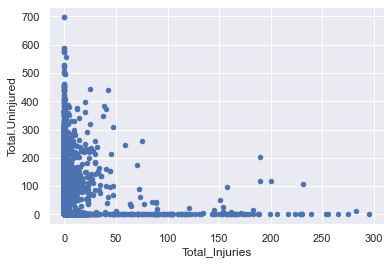

In [29]:
#inverse relationship between uninjured and total injuries
rc_aviation.plot.scatter("Total_Injuries","Total.Uninjured")

In [30]:
#looking at accidents by Country
aviation_country = rc_aviation['Country'].groupby(rc_aviation['Country']).count()
aviation_country

Country
Afghanistan       14
Albania            1
Algeria            5
American Samoa    10
Angola            11
                  ..
Vietnam            5
West Indies       11
Yemen              1
Zambia             2
Zimbabwe           4
Name: Country, Length: 185, dtype: int64

Lastly we wanted to look at accidents by country. We can see in our dataset that we have over 185 countries with the majority of these flights coming from the United States. This is to be expected as the United States has a higher travel industry over many other counties. Furthermore any Europeans businesses travel there in order to conduct business in our market which would directly increase the number of flights in the US.

# Visualize Attributes

#### Top 20 Aviation Accidents with the highest total injuries

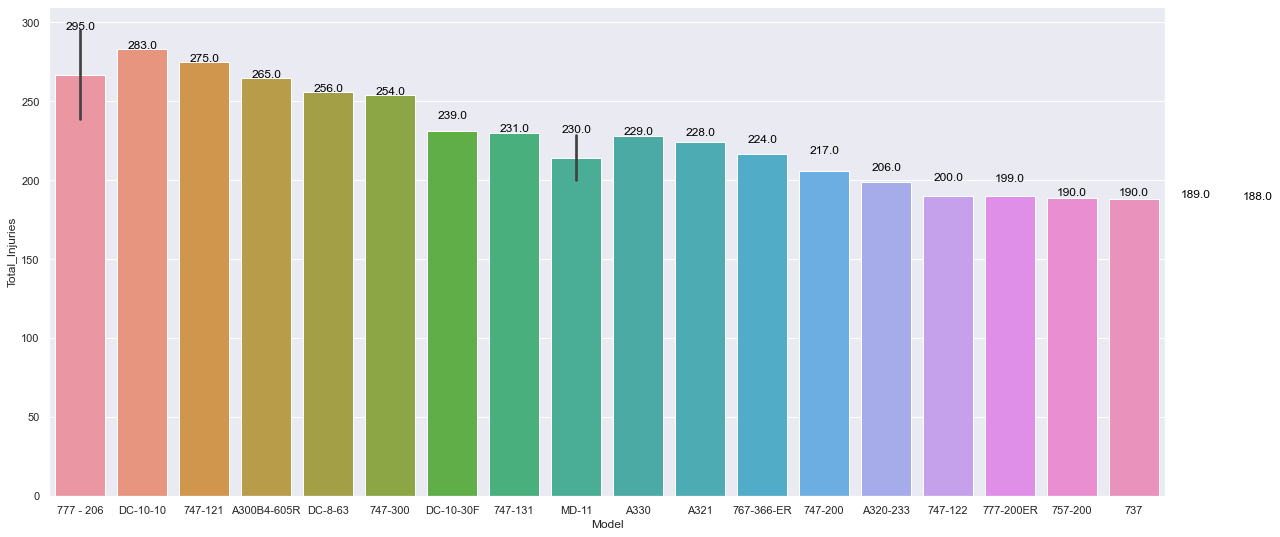

In [41]:
totinj_make = rc_aviation.groupby(['Make','Model','Total_Injuries']).sum().reset_index()
totinj_make
totinj_make = totinj_make.sort_values(by="Total_Injuries", ascending=False)[:20].reset_index()

g = sns.barplot(x="Model", y="Total_Injuries",data=totinj_make[["Model","Total_Injuries"]]);
for index, row in totinj_make[["Model","Total_Injuries"]].iterrows():
    g.text(row.name,row.Total_Injuries, round(row.Total_Injuries,2), color='black', ha="center")
sns.set(rc={'figure.figsize':(20, 9)})
plt.show()

This bar plot shows us a plot of the aviation accidents with the highest number of total injuries. It is important to note that bars with an error bar include two of same models that met an aviation accident. The make is an important feature in predicting aircraft damage, because specific aircraft models are associated with a high number of injuries. In fact, 11 out of the 20 of the aviation accidents that resulted in a significant number of total injuries were manufactured by Boeing.   

#### Top Ten Aircraft Accidents Bar Plot

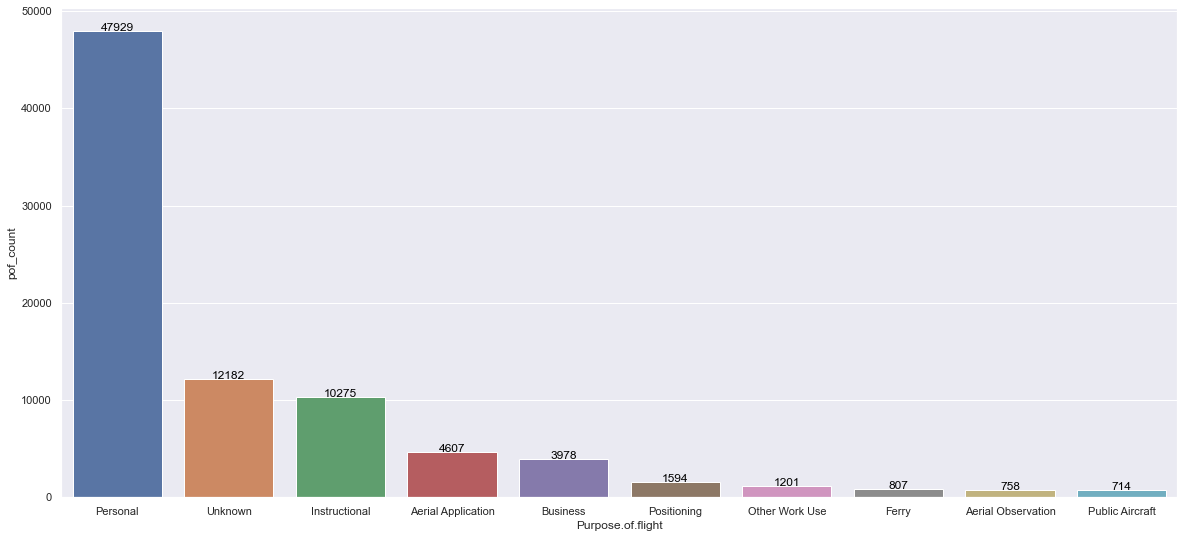

In [37]:
totinj_pof = rc_aviation.groupby(['Purpose.of.flight']).count().reset_index().sort_values(by="Investigation.Type",ascending=False)
#.sort_values(by="Total_Injuries",ascending=False)[:10]
totinj_pof = totinj_pof[["Purpose.of.flight","Investigation.Type"]].reset_index(drop=True)

totinj_pof = totinj_pof.rename(columns = {'Investigation.Type':'pof_count'})
totinj_pof= totinj_pof[:10]

g = sns.barplot(x="Purpose.of.flight", y="pof_count",data=totinj_pof)

for index, row in totinj_pof[["Purpose.of.flight","pof_count"]].iterrows():
    g.text(row.name,row.pof_count, round(row.pof_count,2), color='black', ha="center")

This bar plot shows the count of the purpose of flights for every aviation accident. The highest frequency of aviation accidents are personal (over 60%), followed by instructional (~12%). This could be an important feature in predicting aircraft damage, because more substantial damage can be may be associated with less experienced pilots that are still being instructed. 

#### Density Plots for all continuous predictors 
(Total Injuries,Total Minor Injuries, Total Serious Injuries, and Total Fatal Injuries)

<Figure size 1440x648 with 0 Axes>

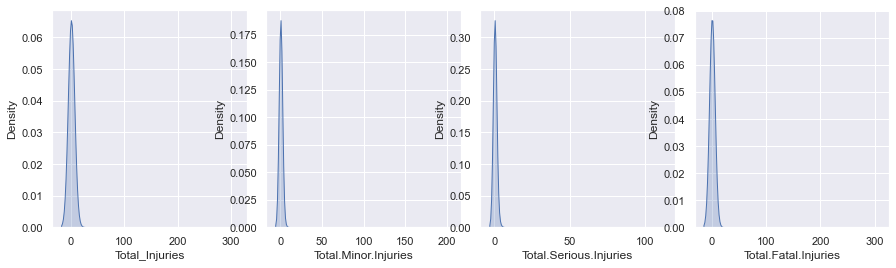

In [45]:
fig = plt.figure()
fig, ax = plt.subplots(1,4,figsize=(15,4))
fig.subplots_adjust(hspace=0, wspace=0.1)

sns.kdeplot(rc_aviation["Total_Injuries"],bw_adjust=10, ax=ax[0], shade = True)
sns.kdeplot(rc_aviation["Total.Minor.Injuries"],bw_adjust=10, ax=ax[1],shade = True)
sns.kdeplot(rc_aviation["Total.Serious.Injuries"],bw_adjust=10, ax=ax[2],shade = True)
sns.kdeplot(rc_aviation["Total.Fatal.Injuries"], bw_adjust=10,ax=ax[3],shade = True)
plt.show()


The kernel density plots above are of all our continuous predictors. Even after removing outliers, our predictors are still heavily right skewed. This makes sense, because there are a small number of aviation accidents that resulted in a high number of injuries for all the predictors. These predictors will be useful in predicting aircraft damage, because there is multicolinearity. However, it would be a usefull predictor for the broad phase of flight. At certain broad phases of an aviation accident may be associated with specific type of injury. It would be interesting to further explore what type of injury may be high correlated with a specific broad phase of flight.

### Top 10 states with highest number of recorded aviation accidents.

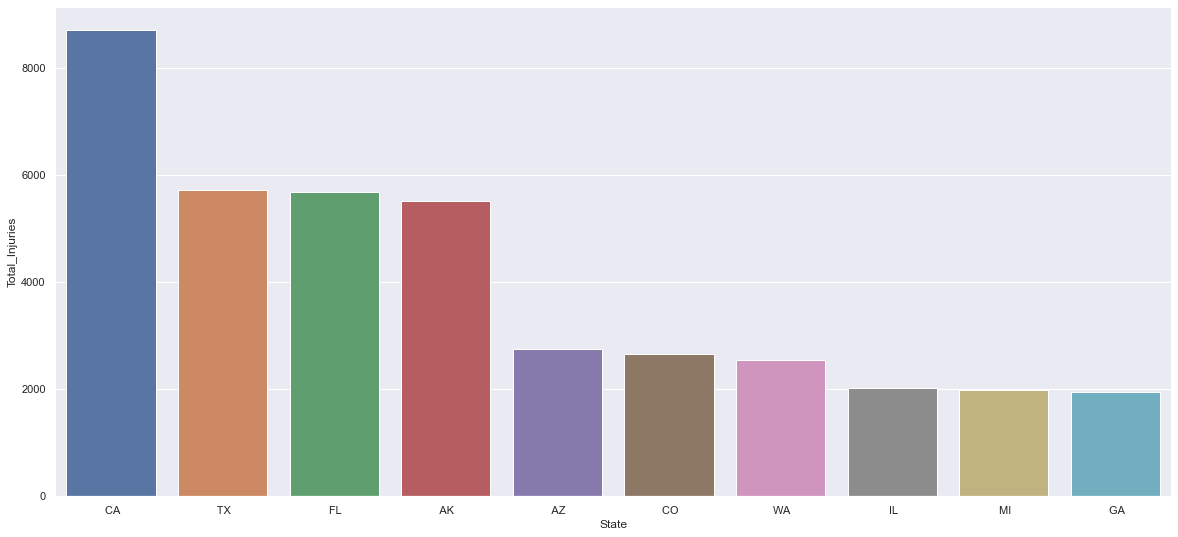

In [46]:
tot_state = rc_aviation.groupby(['State']).count().reset_index().sort_values(by="Total_Injuries",ascending=False)[:10]
g = sns.barplot(x="State", y="Total_Injuries", data=tot_state)

This bar plot shows us the highest count of recorded aviation accidents for the each state. The most recorded aviation accidents occured in California, Texas and Florida. Therefore, the specific state may bias the model if most aviation accidents happen to occur when departing from that state. The aviation accidents being in the top states may just be a byproduct of many flights departing from them. 

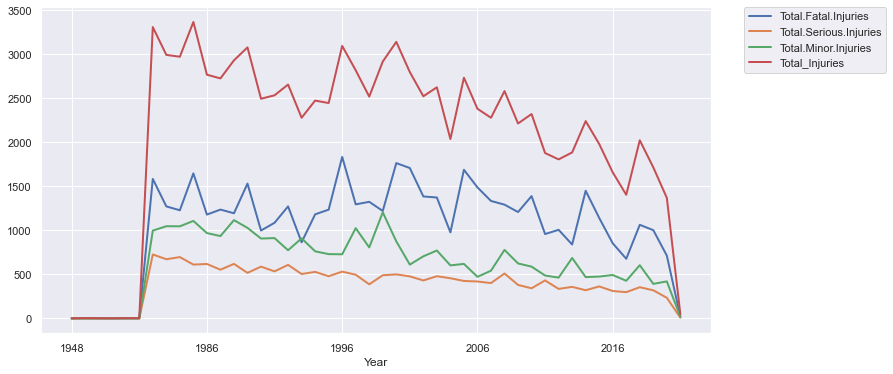

In [31]:
#showing injuries by year
by_year = rc_aviation.groupby('Year').sum()
by_year[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total_Injuries']].plot(lw = 2, figsize=(12,6))
# to move the legend outside of graph
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0)

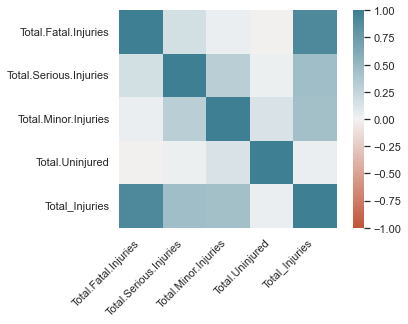

In [32]:
corr =aviation_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

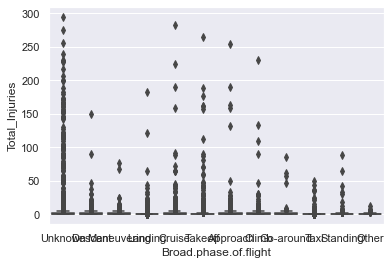

In [33]:
sns.boxplot(x=rc_aviation["Broad.phase.of.flight"], y=rc_aviation["Total_Injuries"] );
sns.set(rc={'figure.figsize':(40, 8)})
plt.show()